# Discrete Choice Dynamic Programming
### by [Jason DeBacker](http://jasondebacker.com), November 2019
This Jupyter notebook will introduce you to the theory of discrete choice dynamic programming and solve an example problem using value function iteration.

## Example: McCall job search model

Consider a simple search model of unemployment.  Workers try to maximize their discounted lifetime utility:
    
   $$ E \sum_{t=0}^{\infty}\beta^{t} u(y_{t}) $$

It is assumed that $u'>0$, $u''<0$, and $\beta < 1$.

Employed workers earn a wage $w$ per period (labor supply is exogenous).  Unemployed workers get unemployment insurance of amount $c$ per period.  Thus, $y_{t}=w$ if employed in period $t$ and $y_{t}=c$ if unemployed in period $t$.

Workers transition between states of employment and unemployment.  With probability $\alpha$ an employed worker loses her job.  Unemployed workers reviece an offer each period to work for wage $w'$, which is drawn from the distribution $p$.  For simplicity, we assume no job search is undertaken on the job - employed workers work for the wage they've agreed to until exogenously separated from their job.

Unemployed workers have a decision to make.  They can accept the offer to work for $w'$ and begin work next period earning that wage.  Of they can reject the offer, remain unemployed, and recieve a job offer next period.

This problem is thus an example of a wider class of problems called *optimal stopping problems*.  The answer to this problem is the answer to the question - at what wage does it make sense for the worker to accept the offer rather than wait for a better one to come by?  Obviously this answer will depend on the risk aversion of the worker (i.e., the curvature of $u(\cdot)$, how much she discounts the future (given by $\beta$), and what the distribution of wages look like.

Let's write the Bellman equation describing this model.  In doing so, we need to consider that the worker can be in one of two states - employed or unemployed.  Let's let $U$ denote the lifetime value of being in the unemployed state today, $E(w)$ be the lifetime value of accepting and being employed at wage $w$, and $V(w)$ be the lifetime value of having a job offer at wage $w$.  Thus we have:


$$ E(w) = u(w) + \beta\left[\alpha U + (1-\alpha)E(w)\right] $$

and

$$ U = u(c) + \beta \int_{w'} V(w') \}dw' $$

and

$$ V(w) = \max\left\{U(w), E(w)\right\} $$


Let's solve this on the computer to illustrate how solving a discrete choice DPP works.


In [1]:
# imports
import numpy as np
import scipy.stats
import matplotlib.pyplot as plt
%matplotlib inline

# Set parameter values
alpha = 0.2
beta = 0.98
b = 15.0  # unemployment benefits
sigma = 2.0  # CRRA for utility function

# discretize grid for w
n = 200  # number of possible outcomes for wage
w_vec = np.linspace(10, 60, n)  # wages between 10 and 20
            
# probabilities for each value of w -- assume drawn from a beta distribution
a_beta, b_beta = 5, 5  # shape parameters of beta
pdf = scipy.stats.beta.pdf(w_vec / (1.1 * w_vec.max()), a_beta, b_beta)
p_vec = pdf / pdf.sum()

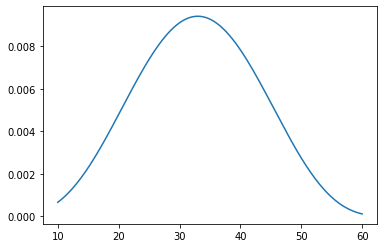

In [2]:
# Plot distributino of wages
plt.plot(w_vec, p_vec)
plt.show()

In [4]:
# A default utility function
def u(c, sigma):
    return (c ** (1 - sigma) - 1) / (1 - sigma)

In [6]:
# VFI 
VFtol = 1e-6
VFdist = 7.0
VFmaxiter = 3000
U = np.zeros_like(w_vec)#np.ones_like(w_vec) * (u(c, sigma) / (1 - beta))  # initial guess at value function for unemployed
E = np.zeros_like(w_vec)  #u(w_vec, sigma) / (1 - beta) # intial guess at value of being employed at each wage
V = np.maximum(U, E)  # initial guess at value function
Vstore = np.empty((n, VFmaxiter))  # initialize Vstore array
VFiter = 1
while VFdist > VFtol and VFiter < VFmaxiter:
    EV = (p_vec * V).sum()  # expected VF, integrating over w'
    U = u(b, sigma) + beta * EV
    E = u(w_vec, sigma) + beta * ((alpha * U) + (1 - alpha) * E)
    TV = np.maximum(U, E)
    PF = E >= U  # PF is 0/1 (reject or accept offer)
    Vstore[:, VFiter] = V
    VFdist = (np.absolute(V - TV)).max()  # check distance between value
    print('VF iteration ', VFiter, ',  distance = ', VFdist)
    V = TV  # update value function
    # function for this iteration and value function from past iteration
    VFiter += 1

VF iteration  1 ,  distance =  1.1401333333333332
VF iteration  2 ,  distance =  1.1096154659425388
VF iteration  3 ,  distance =  1.0805286956001439
VF iteration  4 ,  distance =  1.052687350778101
VF iteration  5 ,  distance =  1.0259429121836323
VF iteration  6 ,  distance =  1.0001760585077362
VF iteration  7 ,  distance =  0.9752904286025235
VF iteration  8 ,  distance =  0.9512077293791554
VF iteration  9 ,  distance =  0.9278638987901893
VF iteration  10 ,  distance =  0.90520609603659
VF iteration  11 ,  distance =  0.8831903403564763
VF iteration  12 ,  distance =  0.8640754126558239
VF iteration  13 ,  distance =  0.843410552558634
VF iteration  14 ,  distance =  0.8232413585393825
VF iteration  15 ,  distance =  0.8035521525090079
VF iteration  16 ,  distance =  0.784334581675699
VF iteration  17 ,  distance =  0.765576537717763
VF iteration  18 ,  distance =  0.7472672086319871
VF iteration  19 ,  distance =  0.7293950871572328
VF iteration  20 ,  distance =  0.711952238872

VF iteration  411 ,  distance =  5.566740623663691e-05
VF iteration  412 ,  distance =  5.433747472949335e-05
VF iteration  413 ,  distance =  5.30393161781717e-05
VF iteration  414 ,  distance =  5.1772171495656494e-05
VF iteration  415 ,  distance =  5.0535299749299156e-05
VF iteration  416 ,  distance =  4.932797770607067e-05
VF iteration  417 ,  distance =  4.8149499363603354e-05
VF iteration  418 ,  distance =  4.6999175680184635e-05
VF iteration  419 ,  distance =  4.587633399921742e-05
VF iteration  420 ,  distance =  4.4780317750792165e-05
VF iteration  421 ,  distance =  4.3710486053782915e-05
VF iteration  422 ,  distance =  4.266621335347054e-05
VF iteration  423 ,  distance =  4.164688902363878e-05
VF iteration  424 ,  distance =  4.065191705393545e-05
VF iteration  425 ,  distance =  3.968071560223052e-05
VF iteration  426 ,  distance =  3.8732716795664146e-05
VF iteration  427 ,  distance =  3.7807366346953586e-05
VF iteration  428 ,  distance =  3.690412312096214e-05
VF 

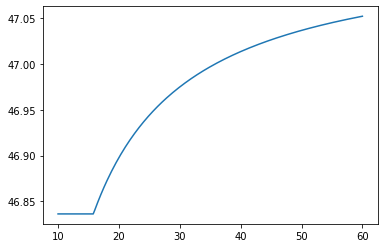

In [7]:
# plot value function:
plt.plot(w_vec, V)
plt.show()

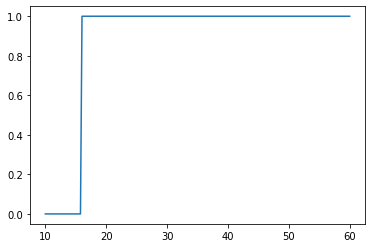

In [8]:
# plot policy function
plt.plot(w_vec, PF)
plt.show()

In [9]:
# see wage that is reservation wage
w_vec[PF][0]

16.030150753768844

In [10]:
PF

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,